<span style="font-size: x-large;">**Point Cloud Triangulation Tutorial**</span>


In this tutorial, we will learn how to perform point cloud triangulation using different algorithms.

Step 1: Import necessary Libraries
To get started, let's import the necessary libraries to our code

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from matplotlib.pyplot import Polygon
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import Delaunay
from pyntcloud import PyntCloud
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull
import open3d as o3d

<span style="font-size: x-large;">**Step 2: Generate Random Points**</span>

Next, we'll generate a set of random points that we'll use for demonstration. 

In [23]:
num_points= 10
points= np.random.rand(num_points, 2)

Before we perform the Delaunay triangulation, let's visualize the set of points that we'll be working with.

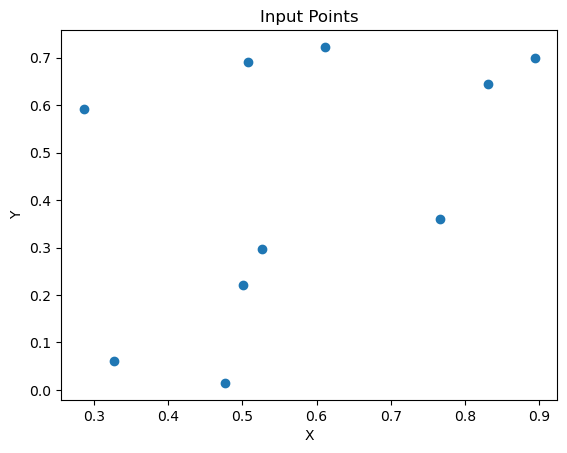

In [24]:
plt.scatter(points[:, 0], points[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Input Points')
plt.show()

<span style="font-size: x-large;">**Step 3: Perform Delaunay Triangulation**</span>


Next, we will use the Delaunay class from scipy.spatial to perform Delaunay triangulation on our points.

In [25]:
tri= Delaunay(points)

<span style="font-size: x-large;">**Step 4: Visualizing Triangulation**</span>


Visualizing the triangulation helps us understand how the poitns are connected to form triangles to create a 3D mesh

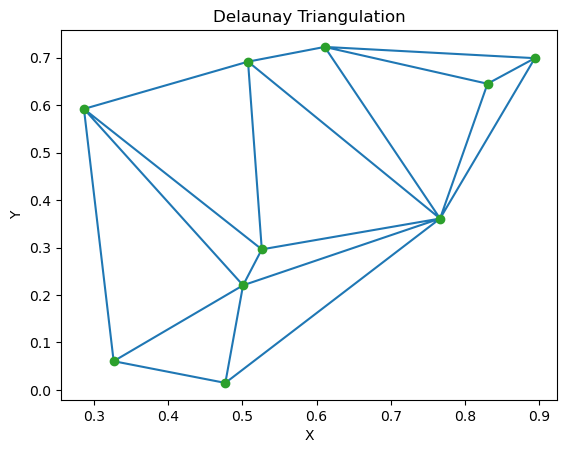

In [26]:
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Delaunay Triangulation')
plt.show()

<span style="font-size: x-large;">**The Delaunay Triangulation Algorithm- How it works**</span>


Delaunay triangulation is a fundamental geometric algorithm used to partition a set of points into non-overlapping triangles. The primary goal of Delaunay triangulation is to create triangles that satisfy the "Delaunay property". This property ensures that no point lies within the circumcircle (the circle that passes through all the vertices) of any triangle in the triangulation.

Here is a step-by-step breakdown of how the Delaunay triangulation algorithm works:
-Input: Begin with a set of points in a plane that you wnat to triangulate

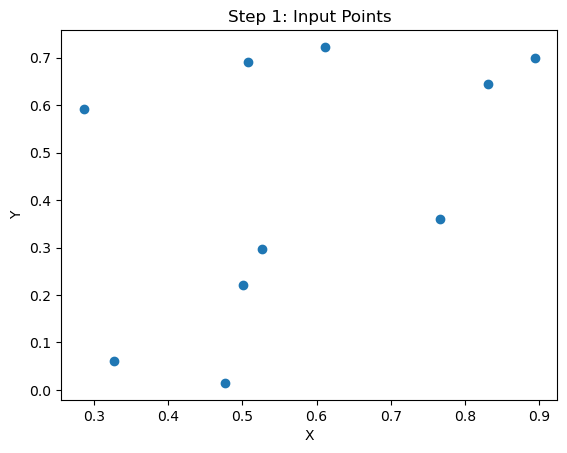

In [27]:
plt.scatter(points[:, 0], points[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Step 1: Input Points')
plt.show()

<span style="font-size: x-large;">**Supertriangle**</span>


Create a large "supertriangle" that fully encloses all the points. This triangle acts as a bounding trianlge to ensure that the convex hull of the points is properly captured

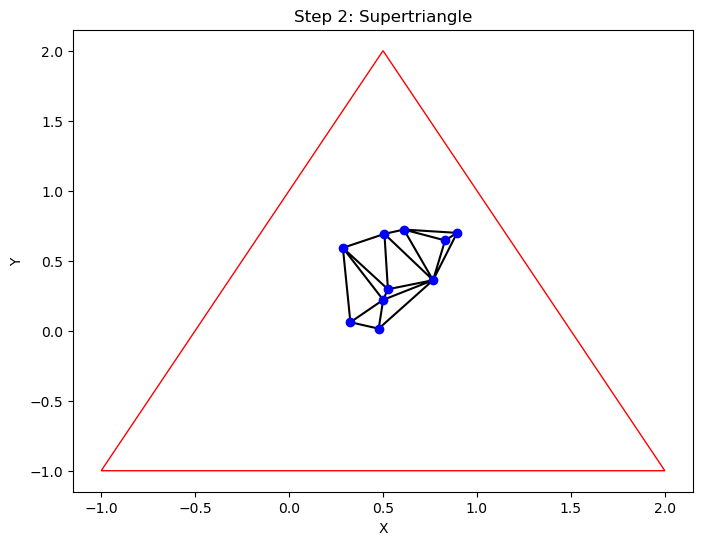

In [28]:
supertriangle = np.array([[-1, -1], [2, -1], [0.5, 2]])
plt.figure(figsize=(8, 6))
plt.triplot(points[:, 0], points[:, 1], color='black')
plt.scatter(points[:, 0], points[:, 1], color='blue')
plt.gca().add_patch(Polygon(supertriangle, closed=True, fill=None, edgecolor='red'))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Step 2: Supertriangle')
plt.show()

<span style="font-size: larger;">**Insertion:**</span>
Add one point at a time from the input set. For each point, find the triangle that contains it using a process called "point location"


<span style="font-size: larger;">**Legalization:**</span>
After inserting a point into a trianlge, the Delaunay propery may be violated, to restor this property, perform "flips". A flip involves swapping an edge of the triangle with the newly inserted point if doing so maintains or restores the Delaunay property


<span style="font-size: larger;">**Repeat:**</span>
Continue inserting points one by one and performing flips until all points are included in the triangulation

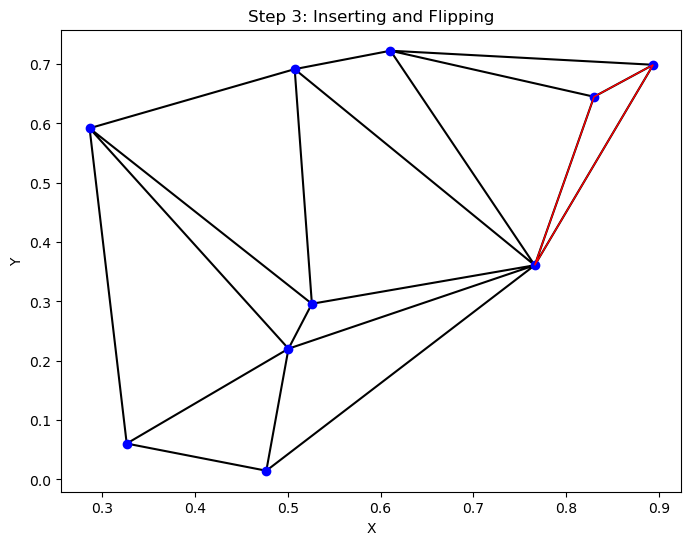

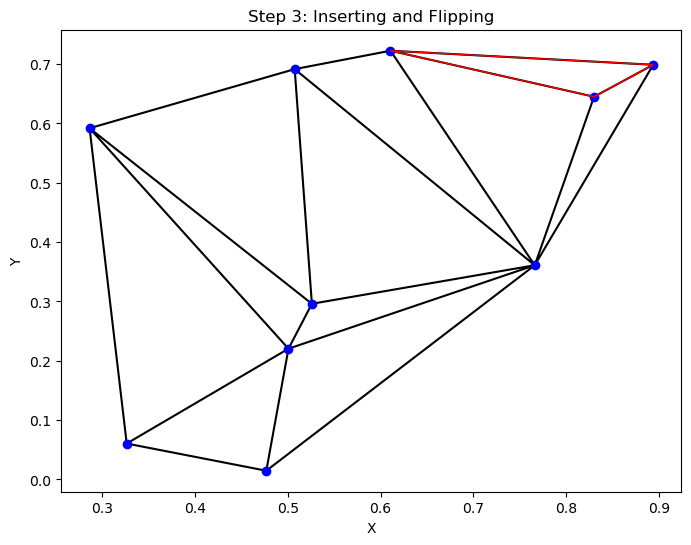

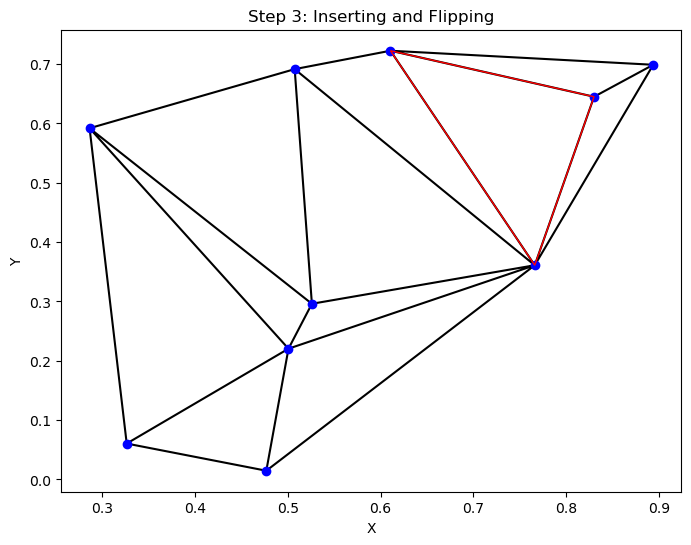

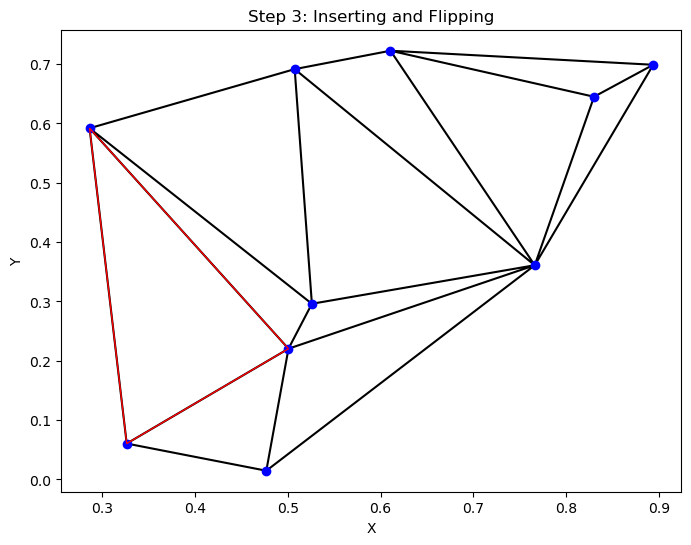

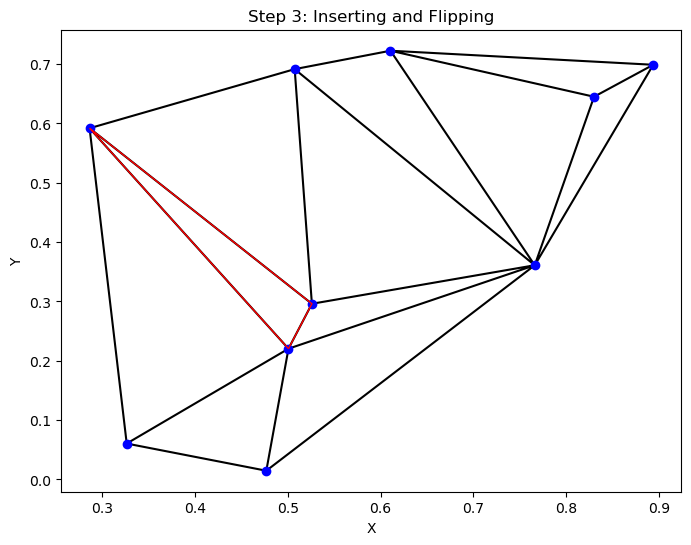

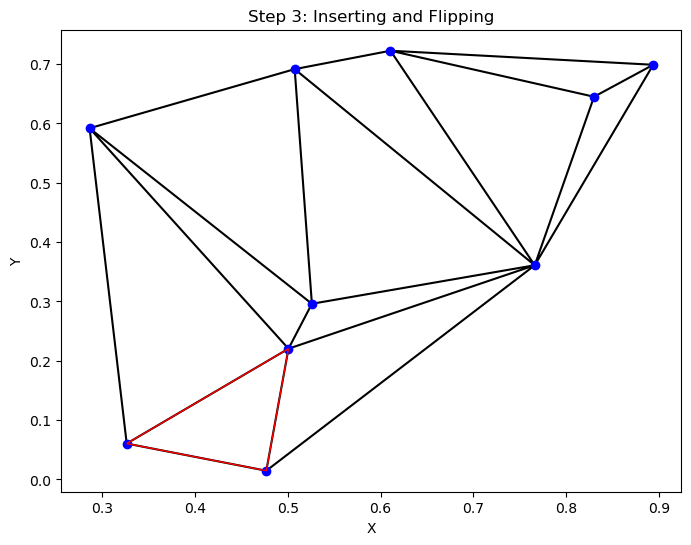

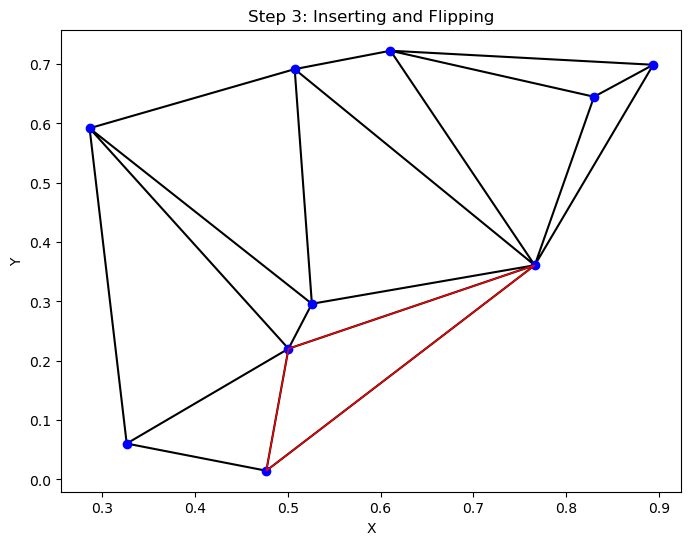

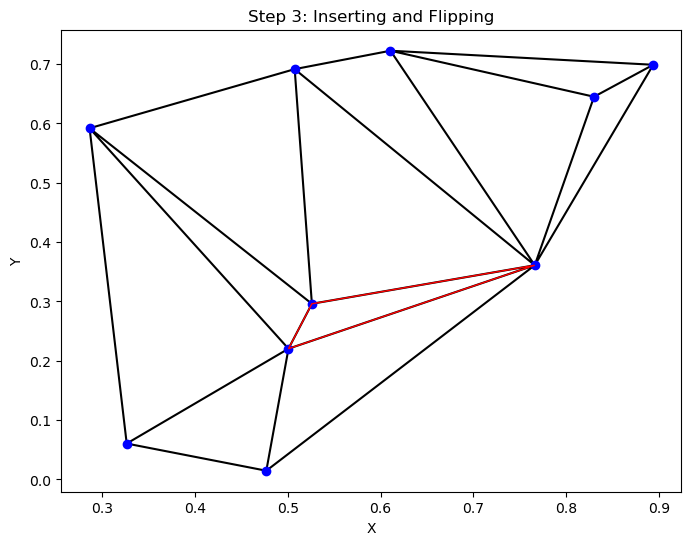

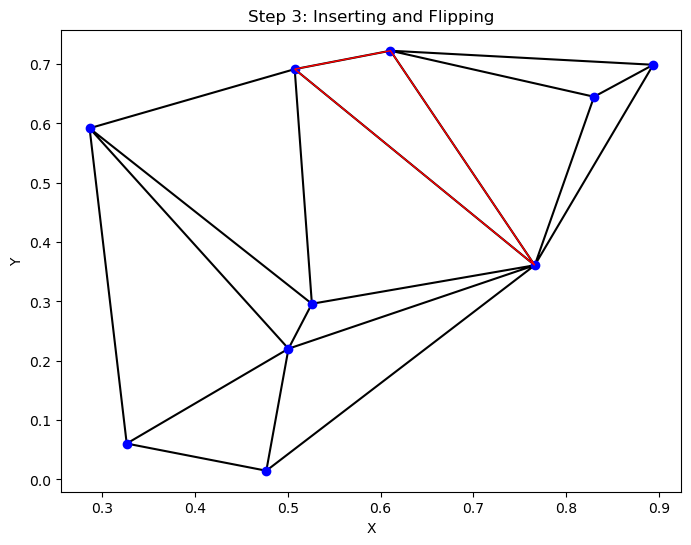

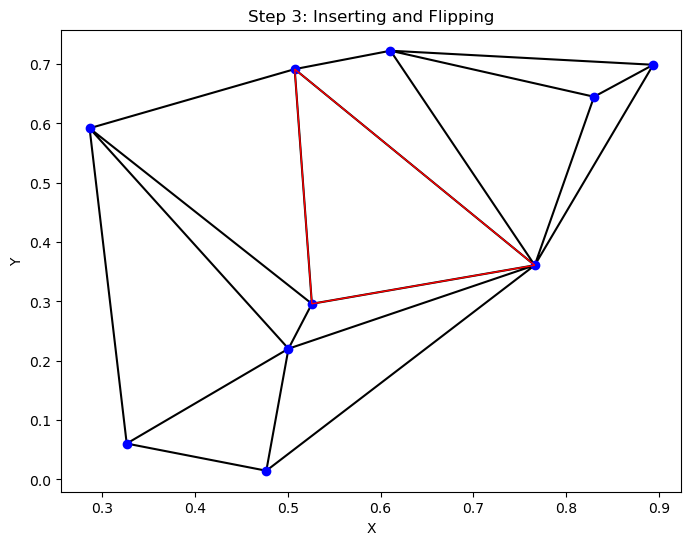

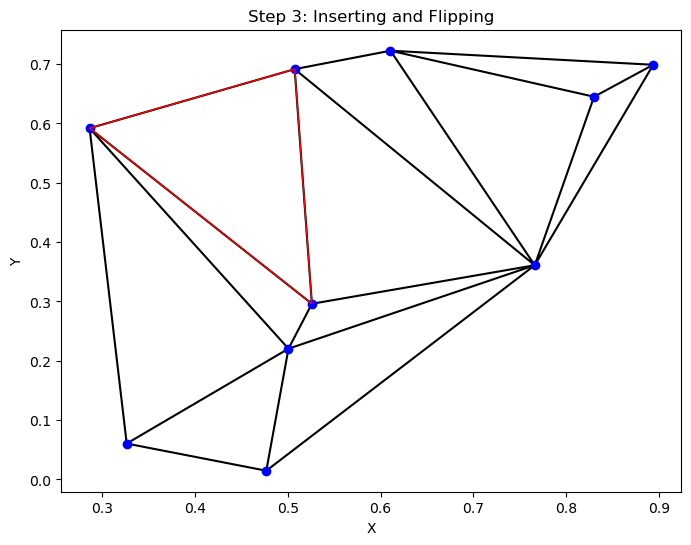

In [29]:
for simplex in tri.simplices:
    plt.figure(figsize=(8, 6))
    plt.triplot(points[:, 0], points[:, 1], tri.simplices, color='black')
    plt.scatter(points[:, 0], points[:, 1], color='blue')
    
    # Highlight the current triangle in red
    plt.gca().add_patch(Polygon(points[simplex], closed=True, fill=None, edgecolor='red'))
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Step 3: Inserting and Flipping')
    plt.show()

<span style="font-size: x-large;">**Remove the supertriangle:**</span>

Remove the vertices and edges of the supertriangle to optain the final Delaunay triangulation

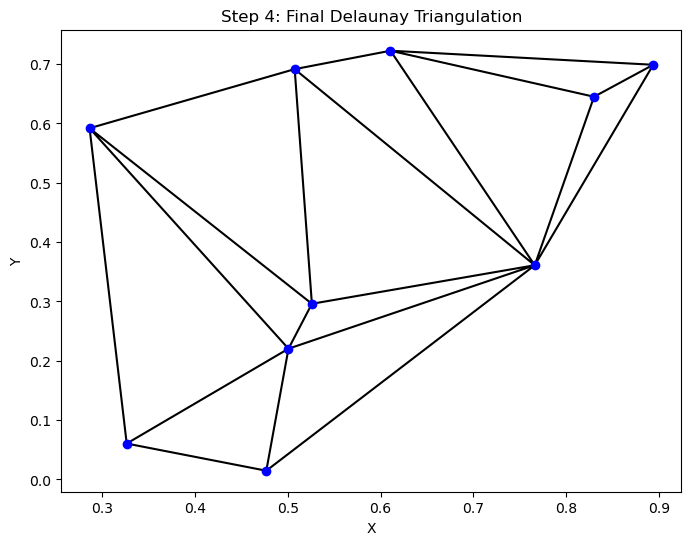

In [30]:
plt.figure(figsize=(8, 6))
plt.triplot(points[:, 0], points[:, 1], tri.simplices, color='black')
plt.scatter(points[:, 0], points[:, 1], color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Step 4: Final Delaunay Triangulation')
plt.show()

Now that we understand how the algorithm works, let's try using it on actual images. 
Let's start with a simple 2d image of a smiley face

In [38]:
image_path= "grayscale smily face.jpeg"
image= imageio.imread(image_path, as_gray= True)

Now let's convert this into a point cloud

In [44]:
points= []
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        if image[y, x] < 128:  # Threshold to consider as a point
            points.append([x, y])
points = np.array(points)

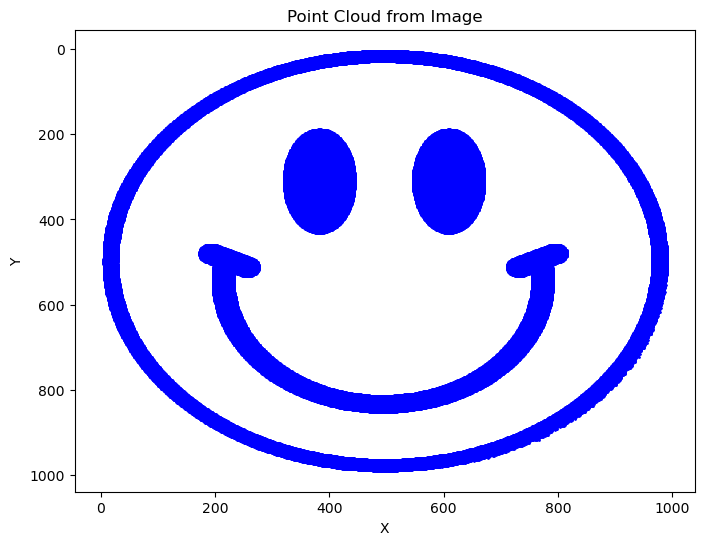

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(points[:, 0], points[:, 1], s=1, color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Point Cloud from Image')
plt.gca().invert_yaxis()  # Invert Y axis to match image coordinates
plt.show()

Using the scipy library, let's apply the Delaunay triangulation algorithm to connect the points with non-overlapping triangles while ensuring no points were inside the circumcircle of any triangle

In [46]:
tri = Delaunay(points)

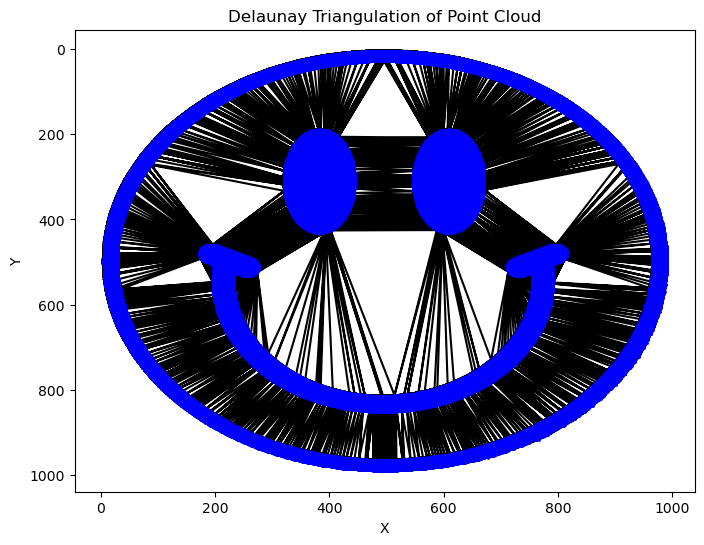

In [47]:
plt.figure(figsize=(8, 6))
plt.triplot(points[:, 0], points[:, 1], tri.simplices, color='black')
plt.scatter(points[:, 0], points[:, 1], s=1, color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Delaunay Triangulation of Point Cloud')
plt.gca().invert_yaxis()  # Invert Y axis to match image coordinates
plt.show()

<span style="font-size: x-large;">**Explaining it's appearance**</span>

The appearance of the Delaunay triangulation of the smiley face point cloud might be surprising, but it can be explained by the distribution of points and the underlying geomerty of the image. When using the Delaunay triangulation algorithm on a point clud generated from an image, the resulting triangulation can reflect certain characteristics of the image.

In this case, the algorithm is trying to connect points in a way that avoids long, skinny triangels and satisfies the Delaunay property. However, the distribution of points generated from the image might lead to some unexpected triangles, especially around the boundary and areas with high point density

Now let's have some fun with 3d points

First let us make a simple 3D point cloud

In [55]:
points_3d = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [0, 1, 0],
    [1, 1, 0],
    [0.8, 0.7, 1],
    [0.9, 0, 1],
    [0.4, 0.2, 1],
    [0.2, 0.5, 1],
    [0.5, 0.9, 1]
])

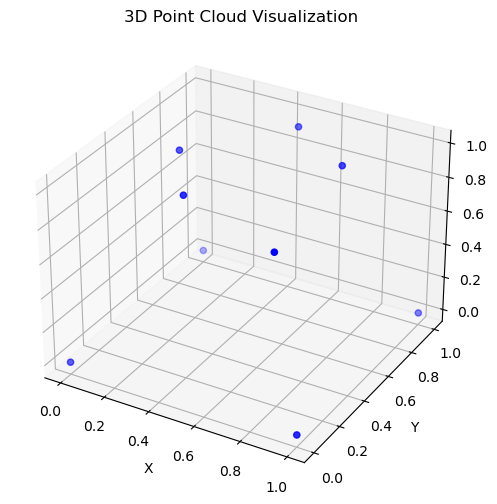

In [56]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D points
ax.scatter(points_3d[:, 0], points_3d[:, 1], points_3d[:, 2], color='blue', s=20)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Point Cloud Visualization')
plt.show()

Now, let's apply the Delaunay triangulation algorithm to our 3D point cloud. This follows a similar pattern to our 2D point cloud by connecting the 3D points with triangles.

In [57]:
tri = Delaunay(points_3d)

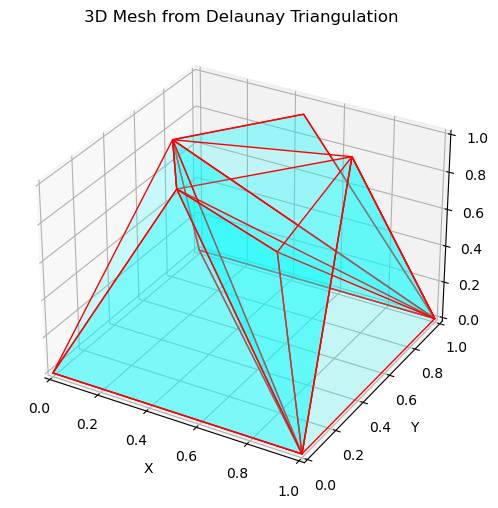

In [58]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the mesh triangles
mesh = Poly3DCollection(points_3d[tri.simplices], facecolors='cyan', linewidths=1, edgecolors='r', alpha=0.2)
ax.add_collection3d(mesh)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Mesh from Delaunay Triangulation')
plt.show()

<span style="font-size: x-large;">**The Convex Hull Method**</span>

While the Dalaunay triangulation algorithm works for irregular point distribution, it faces challenges when it comes to preserving the shape of structured objects.

For this reason, we will not introduce an alternate approach --the Convex Hull Method-- to address these shape preservation concerns with real point clouds.

Now, let's visualize a real life 3d point cloud that has been imported from the internet

In [84]:
point_cloud= np.loadtxt("crystal_4000.xyz")

First, we will visualize the point cloud

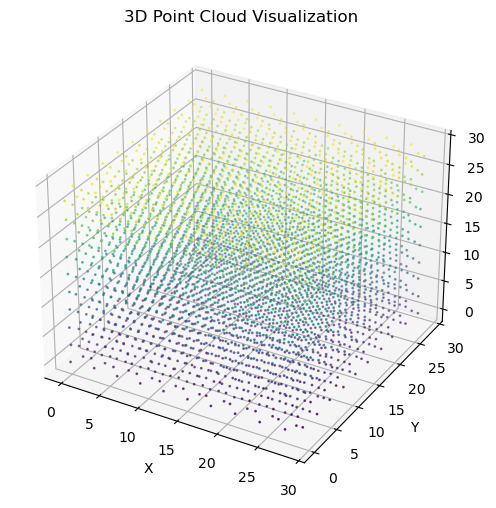

In [85]:
# Visualize the point cloud
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], c=point_cloud[:, 2], cmap='viridis', s=1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Point Cloud Visualization')
plt.show()

Next, we will apply the Convex Hull triangulation algorithm to this 3D point cloud. 

In [86]:
#tri = Delaunay(point_cloud)
tri= ConvexHull(point_cloud)

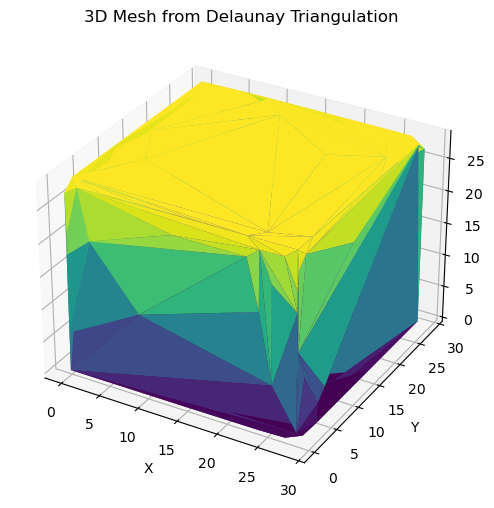

In [87]:
# Visualize the 3D mesh
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the mesh triangles with correct coloring
ax.plot_trisurf(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], triangles=tri.simplices, cmap='viridis', edgecolor='none')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Mesh from Delaunay Triangulation')
plt.show()

<span style="font-size: x-large;">**Limitations of the Delaunay Algorithm**</span>


Teapots, with their intricate curves and detailed structure present a challenging case for 3D mesh generation. As we apply the Delaunay triangulation algorithm to a teapot-shaped point cloud, we notice that the algorithm primarily focuses on connecting neighboring points, often resulting in irregular and unexpected shapes. 

To better understand this phenomenon lets look at a visualization that contrasts the original teapot point cloud with the mesh generated by the Delaunay triangulation algorithm. 

This visualization vividly demonstrates how the Delaunay algorithm can devite from the true structure of an object

In [88]:
# Load the .xyz file
file_path = "teapot_306.xyz"
with open(file_path, "r") as file:
    lines = file.readlines()
    
point_cloud = []
for line in lines:
    values = line.strip().split()  # Remove leading/trailing whitespace and split by spaces
    cleaned_values = [float(value.replace(',', '')) for value in values]  # Remove commas and convert to float
    point_cloud.append(cleaned_values)
    
# Convert to numpy array for further processing
point_cloud = np.array(point_cloud)

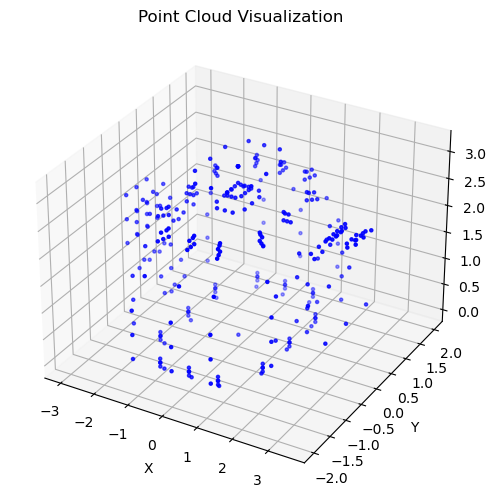

In [89]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], c='blue', marker='o', s=5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Point Cloud Visualization')
plt.show()

In [90]:
tri = Delaunay(point_cloud)


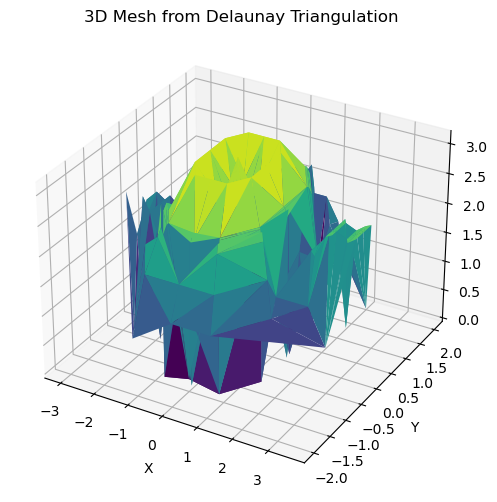

In [91]:
# Visualize the 3D mesh
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the mesh triangles with correct coloring
ax.plot_trisurf(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], triangles=tri.simplices, cmap='viridis', edgecolor='none')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Mesh from Delaunay Triangulation')
plt.show()

<span style="font-size: x-large;">**Advantages of Delaunay triangulation**</span>

While the Delaunay triangulation may not be the ideal choice for preserving the shape of complex structures it excels in scenarios where the point distributino is irregular or where the shape is less defined. It remains a valuable tool for generating meshes in cases where the intended shape is not a critical consideration like the examples above where we generated a mesh from a randomly distributed point cloud.

<span style="font-size: x-large;">**Limitations of Convex Hull Method**</span>

Finally, let us observe how the ConvexHull algorithm works on the point cloud of a cube.

Consider a point cloud representing the vertices of a cube. Applying the convex hull algorithm can lead to extra facets being created.
The convex hull's nature as a convex shape means it creates additional facets around the corners of the cube, distorting its original form.
Convex hulls prioritize convexity over accuracy. This leads to shape distortion, especially for objects with flat surfaces, like our cube.

While the convex hull method has its advantages, such as speed and simplicity, it struggles when it comes to preserving the accurate representation of complex objects like a cube. The extra facets, shape distortion, and inaccuracies make it less suitable for such cases.
In the next section, we'll explore an alternative approach that overcomes these limitations: the Ball Pivoting Algorithm.


In [92]:
point_cloud= np.loadtxt("cube.xyz")

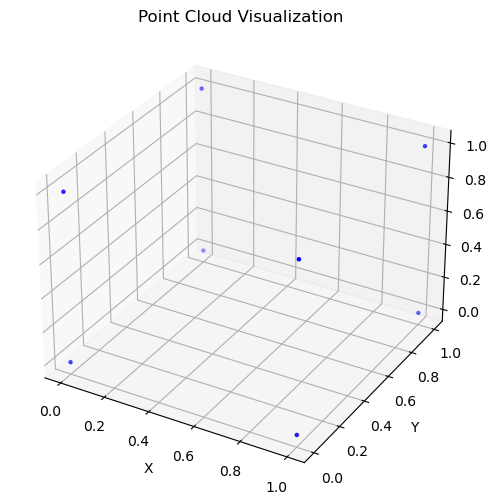

In [93]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], c='blue', marker='o', s=5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Point Cloud Visualization')
plt.show()

In [94]:
# Compute the convex hull mesh
tri = ConvexHull(point_cloud)

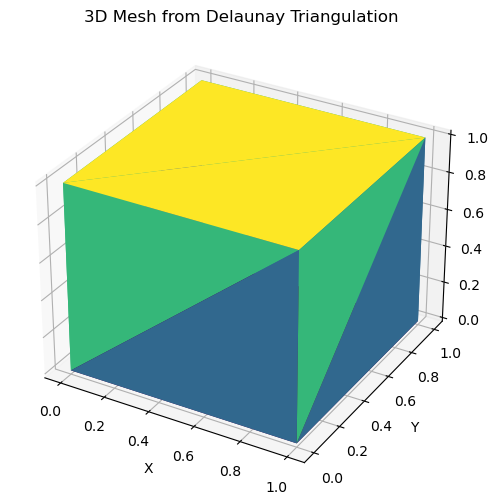

In [95]:
# Visualize the 3D mesh
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the mesh triangles with correct coloring
ax.plot_trisurf(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], triangles=tri.simplices, cmap='viridis', edgecolor='none')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Mesh from Convex Hull Method')
plt.show()

<span style="font-size: x-large;">**Introducing Ball Pivoting Algorithm**</span>

Improved 3D mesh generation

The Ball-Pivoting Algorithm is a method for generating a 3D mesh from a point cloud, assuming that the points in the cloud represent a noise-free surface of an object. The fundamental idea behind BPA is to simulate the process of rolling a virtual ball over the points to generate a mesh that approximates the surface

<span style="font-size: x-large;">**Advantages**</span>

1. **Shape Preservation**: Ball Pivoting accurately preserves the shape of complex objects like cubes, without extra facets or shape distortion.

2. **Smoother Surfaces**: Generates smoother surfaces by pivoting spheres on point clouds.

3. **Intricate Shapes**: Ideal for handling intricate geometries and non-uniformly distributed points.

4. **Controlled Connectivity**: Offers controlled connectivity by considering local geometry.


<span style="font-size: x-large;">**Key Concepts**</span>

1. Virtual Ball: BPA uses a virtual ball to explore the point cloud. The ball's center moves from one point to another while its radius determines the reach of exploration.
2. Surface Sampling: BPA assumes that the input point cloud represents a noise-free surface. Therefore, each point in the cloud corresponds to a point on the actual object's surface.
3. Mesh Generation: As the virtual ball rolls, it pivots on the edges formed by three points. The points on the surface that lie within the ball's radius are connected, generating the mesh.


Now let's use this algorithm on a previous point clouds we have seen before-- the crystal

In [ ]:
pcd = o3d.io.read_point_cloud("crystal_4000.xyz")
pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))

In [ ]:
nn_distances = pcd.compute_nearest_neighbor_distance()
avg_nn_distance = np.mean(nn_distances)
radius_of_ball = 3 * avg_nn_distance
bpa_mesh = o3d.geometry.TriangleMesh\
    .create_from_point_cloud_ball_pivoting(pcd,o3d.utility.DoubleVector([radius_of_ball, radius_of_ball ]))

o3d.visualization.draw_geometries([bpa_mesh])

Now, let's visualize the results of the point cloud 

![Open3D Visualization](https://user-images.githubusercontent.com/109975216/262523659-cd562238-9e12-4cae-8eb2-0cec0f10a09e.png)

<span style="font-size: x-large;">**Steps of the Algorithm**</span>


The BPA process involves the following steps:

1. Seed Point Selection: Choose a starting point as the seed. This point will serve as the initial ball center.
2. Nearest Neighbor Search: Find the nearest unprocessed point to the current ball center. This point will be used to pivot the virtual ball.
3. Ball Pivoting: Imagine placing a ball with the current ball center at its center on the selected point. Rotate the ball to find other points within the ball's radius that can form a triangle with the ball center and the selected point.
4. Surface Point Addition: If valid points are found within the ball, add them to the mesh and mark them as processed.
5. Pivot Point Update: Set the newly found point as the pivot point for the next iteration and continue the process.
6. Termination: Repeat the above steps until there are no more unprocessed points or no valid points can be found within the ball's radius.

<span style="font-size: x-large;">**Limitations of the Ball Pivoting Algorithm**</span>
- Ball Pivoting requires careful parameter tuning.
- Uneven point distribution can affect the algorithm's performance
- Noise in the point cloud can introduce error in the mesh
- Ball Pivoting involves numerous geometric calculations


To learn more about other mesh generation algorithms and their limitations, you can explore:

- [Marching Cubes Algorithm](https://github.com/alvin-yang68/Marching-Cubes)
- [Poisson Surface Reconstruction](https://github.com/danielTobon43/pointcloudToMesh)
- [Moving Least Squares](https://github.com/Jarvis73/Moving-Least-Squares)